## Let's first import the necessary libraries

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb

In [152]:
df = pd.read_csv('./dataset/Parco_Veicoli.csv')
df

/var/folders/81/f9z4jcsj7gz1v7bs26nb55jm0000gn/T/ipykernel_3014/1160917084.py:1: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/Parco_Veicoli.csv')


,PROGRESSIVO,TIPO_TARGA,UTILIZZO,SPECIALITA,RIMORCHIABILITA,CILIDRATA,ALIMENTAZIONE,PORTATA,NUM_POSTI,TIPO_IMPIANTO,DISISTALLAZIONE_IMPIANTO,KW,ANNO_IMMATRICOLAZIONE,NUM_ASSI,EURO,CO2,PESO_COMPLESSIVO,CAP_RESIDENZA_PROPR,PROV_RESIDENZA
0,1,3,4,NaN,N,NaN,NaN,800.0,000,NaN,NaN,NaN,1998,2.0,0,NaN,1200.0,89046.0,RC
1,2,1,PV,NaN,NaN,1698.0,GA,385.0,005,NaN,NaN,51.0,1998,2.0,2,0.0,1510.0,88046.0,CZ
2,3,1,5,NaN,NaN,14618.0,GA,16730.0,003,NaN,NaN,320.0,1998,4.0,2,0.0,32000.0,87036.0,CS
3,4,1,5,NaN,NaN,13798.0,GA,11450.0,002,NaN,NaN,309.0,1998,3.0,2,0.0,26000.0,88060.0,CZ
4,5,1,0,NaN,NaN,1998.0,BE,500.0,005,NaN,NaN,137.0,1998,2.0,2,0.0,2010.0,87036.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433489,1433490,1,PV,NaN,S,NaN,ELE,00515,5.0,NaN,NaN,127.0,2023,2.0,NE,NaN,2895.0,88040.0,CZ
1433490,1433491,1,6,NaN,N,12902.0,G,13100,3.0,NaN,NaN,300.0,2008,3.0,4,NaN,26000.0,88100.0,CZ
1433491,1433492,1,NR,PIA,S,2488.0,G,NaN,3.0,NaN,NaN,81.0,2011,2.0,4,NaN,3500.0,87050.0,CS
1433492,1433493,1,NC,NaN,S,12740.0,G,04200,55.0,NaN,NaN,324.0,2013,2.0,5,NaN,18000.0,89824.0,VV


## Now it's time to prepare the data for the model

In [153]:
# change the column names into lowercase
df.columns = df.columns.str.lower()
df

,progressivo,tipo_targa,utilizzo,specialita,rimorchiabilita,cilidrata,alimentazione,portata,num_posti,tipo_impianto,disistallazione_impianto,kw,anno_immatricolazione,num_assi,euro,co2,peso_complessivo,cap_residenza_propr,prov_residenza
0,1,3,4,NaN,N,NaN,NaN,800.0,000,NaN,NaN,NaN,1998,2.0,0,NaN,1200.0,89046.0,RC
1,2,1,PV,NaN,NaN,1698.0,GA,385.0,005,NaN,NaN,51.0,1998,2.0,2,0.0,1510.0,88046.0,CZ
2,3,1,5,NaN,NaN,14618.0,GA,16730.0,003,NaN,NaN,320.0,1998,4.0,2,0.0,32000.0,87036.0,CS
3,4,1,5,NaN,NaN,13798.0,GA,11450.0,002,NaN,NaN,309.0,1998,3.0,2,0.0,26000.0,88060.0,CZ
4,5,1,0,NaN,NaN,1998.0,BE,500.0,005,NaN,NaN,137.0,1998,2.0,2,0.0,2010.0,87036.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433489,1433490,1,PV,NaN,S,NaN,ELE,00515,5.0,NaN,NaN,127.0,2023,2.0,NE,NaN,2895.0,88040.0,CZ
1433490,1433491,1,6,NaN,N,12902.0,G,13100,3.0,NaN,NaN,300.0,2008,3.0,4,NaN,26000.0,88100.0,CZ
1433491,1433492,1,NR,PIA,S,2488.0,G,NaN,3.0,NaN,NaN,81.0,2011,2.0,4,NaN,3500.0,87050.0,CS
1433492,1433493,1,NC,NaN,S,12740.0,G,04200,55.0,NaN,NaN,324.0,2013,2.0,5,NaN,18000.0,89824.0,VV


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433494 entries, 0 to 1433493
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   progressivo               1433494 non-null  int64  
 1   tipo_targa                1433494 non-null  int64  
 2   utilizzo                  1433475 non-null  object 
 3   specialita                19609 non-null    object 
 4   rimorchiabilita           921586 non-null   object 
 5   cilidrata                 1408879 non-null  float64
 6   alimentazione             1411074 non-null  object 
 7   portata                   1431120 non-null  object 
 8   num_posti                 1431699 non-null  object 
 9   tipo_impianto             60800 non-null    object 
 10  disistallazione_impianto  53 non-null       object 
 11  kw                        1411419 non-null  float64
 12  anno_immatricolazione     1433494 non-null  int64  
 13  num_assi                  1

In [155]:
df.shape

(1433494, 19)

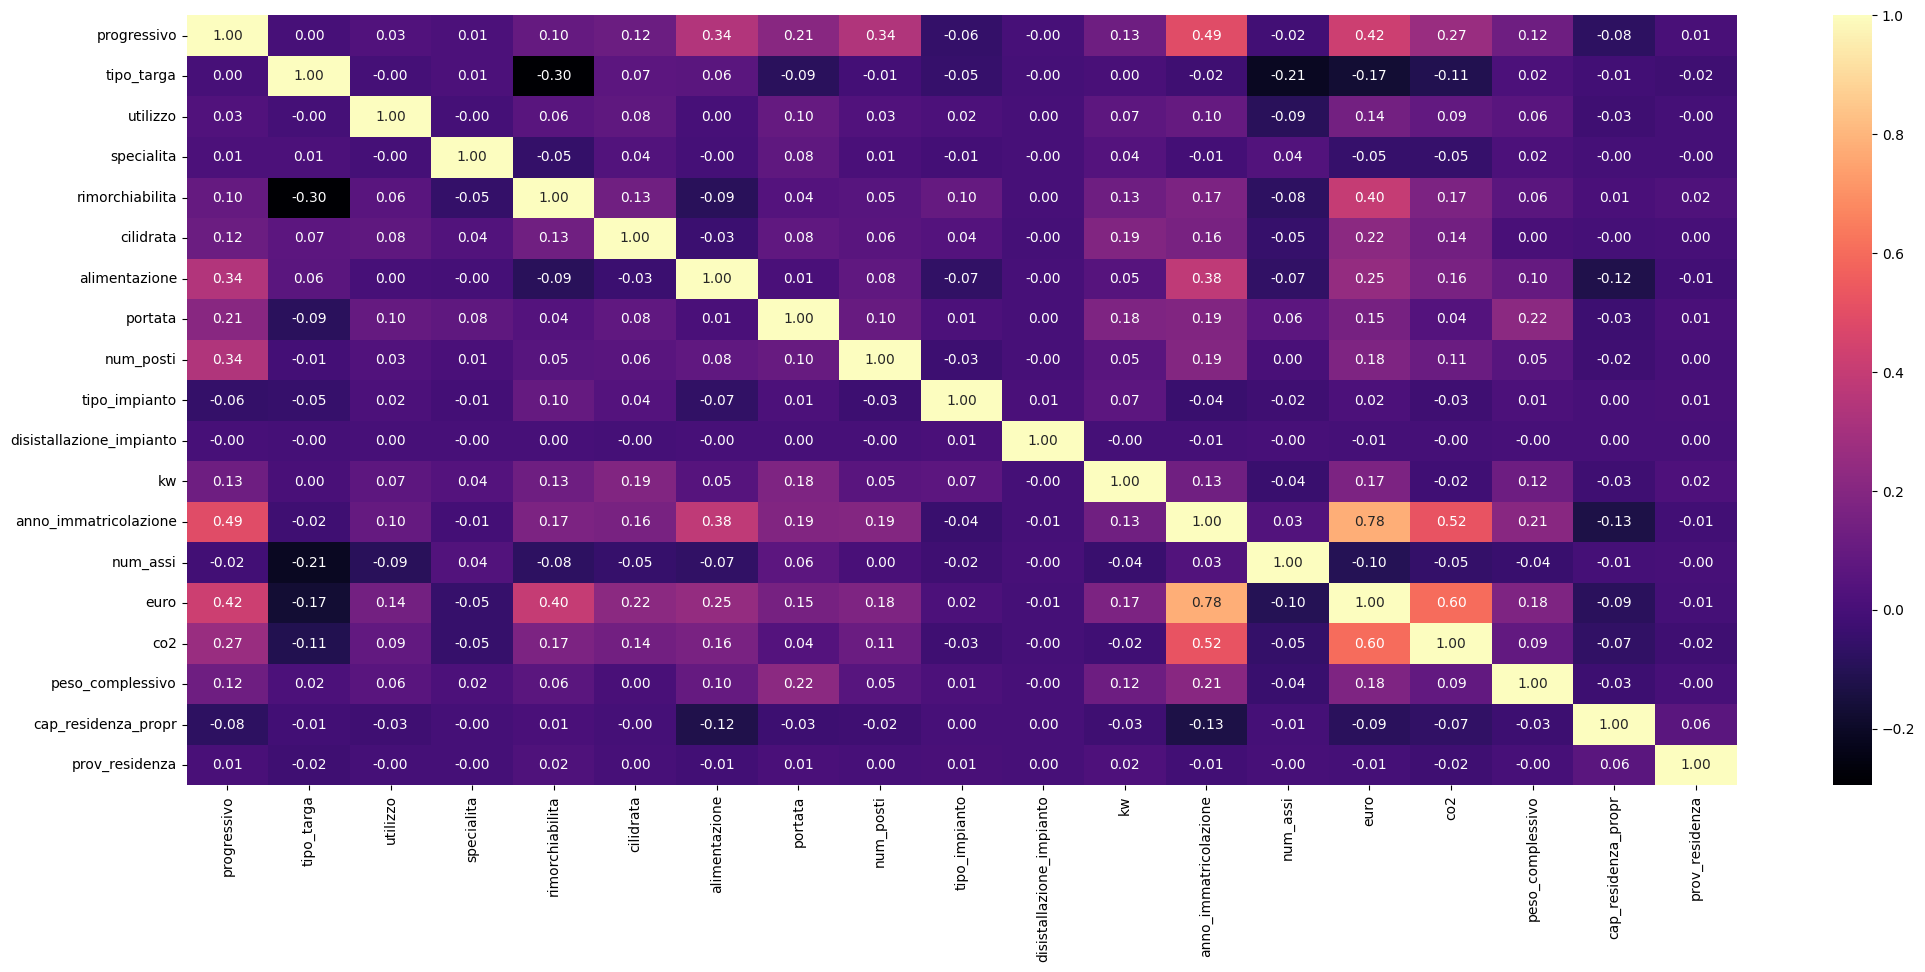

In [156]:
df_heatmap = df.copy()

# Manually encode each column
for column in df.columns:
    unique_values = df[column].unique()
    value_mapping = {value: index for index, value in enumerate(unique_values)}
    df_heatmap[column] = df[column].map(value_mapping)


plt.figure(figsize=(25, 10))
sb.heatmap(df_heatmap.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

In [157]:
df = df[~((df["co2"] == 0) & (df["alimentazione"] != "ELE"))].copy()

df.loc[df["alimentazione"] == "ELE", "co2"] = df.loc[df["alimentazione"] == "ELE", "co2"].fillna(0)

df.dropna(subset=["prov_residenza", "alimentazione", "anno_immatricolazione", "co2"], inplace=True)

df.loc[df["alimentazione"] == "ELE", "co2"]

866548     0.0
916685     0.0
1016953    0.0
1021838    0.0
1028143    0.0
          ... 
1433342    0.0
1433343    0.0
1433398    0.0
1433409    0.0
1433489    0.0
Name: co2, Length: 1920, dtype: float64

In [158]:
df = df[["prov_residenza", "anno_immatricolazione", "co2"]]

df

,prov_residenza,anno_immatricolazione,co2
16,CZ,1998,1960.0
1102,CS,1998,1640.0
1105,CS,1998,1640.0
1117,KR,1998,1600.0
1120,CS,1998,1640.0
...,...,...,...
1433483,RC,2011,1100.0
1433486,KR,2024,1050.0
1433487,RC,2019,1110.0
1433488,CS,2020,520.0


In [159]:
df = df.groupby(["prov_residenza", "anno_immatricolazione"])["co2"].mean().round(0).astype(int).reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   prov_residenza         135 non-null    object
 1   anno_immatricolazione  135 non-null    int64 
 2   co2                    135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


## Define the model

### SKLearn

In [ ]:
x_train = df[(df["anno_immatricolazione"] > 1998) & (df["anno_immatricolazione"] < 2024)]
y_train = x_train["co2"]

x_test = df[(df["anno_immatricolazione"] == 2024)]
y_test = x_test["co2"]

encoder = OneHotEncoder()
prov_encoded = encoder.fit_transform(x_train[["prov_residenza"]]).toarray()
prov_test_encoded = encoder.fit_transform(x_test[["prov_residenza"]]).toarray()

encoder.fit(np.concat([x_train[["anno_immatricolazione"]],x_test[["anno_immatricolazione"]]]))
anno_imm = encoder.transform(x_train[["anno_immatricolazione"]]).toarray()
anno_imm_test = encoder.transform(x_test[["anno_immatricolazione"]]).toarray()

x_train = np.concatenate([prov_encoded, anno_imm], axis = 1)
x_test = np.concatenate([prov_test_encoded, anno_imm_test], axis=1)

y_train = np.array(y_train)
y_test = np.array(y_test)

(5, 26)


/Users/ciccio/Library/Caches/pypoetry/virtualenvs/accenture-challenge-QGHO62Cj-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/ciccio/Library/Caches/pypoetry/virtualenvs/accenture-challenge-QGHO62Cj-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [207]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [208]:
model.score(x_train, y_train)

0.9956171612045681

In [280]:
model.predict(x_test)

array([1304.88, 1305.24, 1323.88, 1292.72, 1299.24])

In [210]:
y_test

array([1152., 1151., 1141., 1085., 1152.], dtype=float32)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)

score = rf_model.score(x_test_scaled, y_test)
print(f"Random Forest Model Score: {score}")

### Torch

In [282]:
class Regressor(nn.Module):
    
    def __init__(self, input_size):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1)
        )

        #nn.init.xavier_uniform_(self.model.weight)

    def forward(self, input):
        return self.model(input)
    
    def train_model(self, x_train, y_train, epochs=20, lr=0.01, mode = True):
        super().train(mode)
        losses = []
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            optimizer.zero_grad()

            x_hat = self.forward(x_train)

            loss = (x_hat - y_train).square().mean()

            loss.backward()

            optimizer.step()

            losses.append(loss.item())

            # if epoch % 5 == 0:
            #     print(f"Epoch: {epoch}, loss: {loss.item()}")

        
        plt.style.use('fivethirtyeight')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')

        # Plotting the last 150 values
        plt.plot(losses[-150:])
        plt.show()


In [212]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

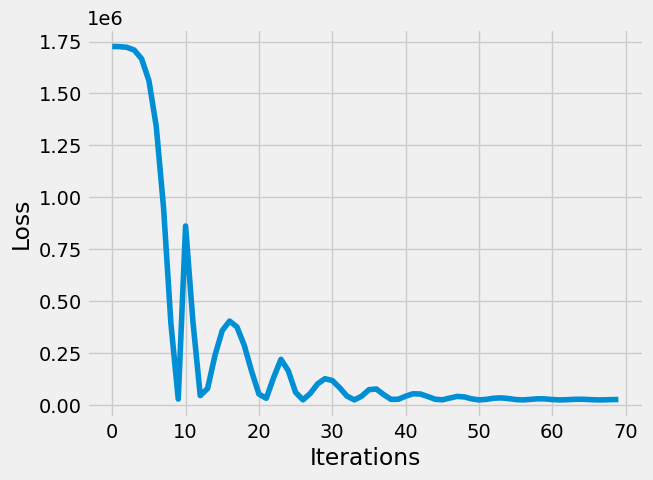

In [284]:
reg = Regressor(x_train.shape[1])
reg.train_model(x_train=x_train_tensor, y_train=y_train_tensor, epochs=70, lr=0.05)


In [279]:
reg.eval()
reg(x_test_tensor)

tensor([[906.0540],
        [908.6670],
        [906.0868],
        [909.1451],
        [906.1293]], grad_fn=<AddmmBackward0>)

In [223]:
y_test_tensor

tensor([1152., 1151., 1141., 1085., 1152.])